In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import neighbors, datasets, tree, linear_model, metrics,svm
from sklearn.model_selection import cross_val_score, train_test_split,KFold
import itertools
from itertools import permutations
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Question 4

# 1. Import Data

In [26]:
#1. Import Data
data =  pd.read_csv('wdbc.data', sep=",",header=None)
#2. Fix the column names
features=['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
atr=['mean','standard error','largest']
column1 = ['ID','Diagnosis']
column2 = list(itertools.product(features,atr))
for i in range(len(column2)):
    column2[i]='-'.join(column2[i])
column1.extend(column2)
data.columns=column1
data=data.iloc[:,1:]
data.head(3)

,Diagnosis,radius-mean,radius-standard error,radius-largest,texture-mean,texture-standard error,texture-largest,perimeter-mean,perimeter-standard error,perimeter-largest,...,concavity-largest,concave points-mean,concave points-standard error,concave points-largest,symmetry-mean,symmetry-standard error,symmetry-largest,fractal dimension-mean,fractal dimension-standard error,fractal dimension-largest
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
#data.isna().sum()
data.describe()

,radius-mean,radius-standard error,radius-largest,texture-mean,texture-standard error,texture-largest,perimeter-mean,perimeter-standard error,perimeter-largest,area-mean,...,concavity-largest,concave points-mean,concave points-standard error,concave points-largest,symmetry-mean,symmetry-standard error,symmetry-largest,fractal dimension-mean,fractal dimension-standard error,fractal dimension-largest
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2. Performance Metric

Given that the consequence of not identifying maligant case is also serious, I want to also take **Recall** into account and therefore choose the **F-measure(maligant)** as our performance matric.

# 3. Data Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:,1:]=scaler.fit_transform(data.iloc[:,1:])
data.head(10)

,Diagnosis,radius-mean,radius-standard error,radius-largest,texture-mean,texture-standard error,texture-largest,perimeter-mean,perimeter-standard error,perimeter-largest,...,concavity-largest,concave points-mean,concave points-standard error,concave points-largest,symmetry-mean,symmetry-standard error,symmetry-largest,fractal dimension-mean,fractal dimension-standard error,fractal dimension-largest
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,M,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,M,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,M,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,M,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,M,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


# 4. Nested CV  
Via NestedCV, I want to first find out which method has the best performance. After finding the best method, I will conduct grid search to find the best hyper-parameters for the model.

In [69]:
# Split the target variable
y_data=np.where(data['Diagnosis']=='M',1,0)
x_data=data.iloc[:,1:]

# Create the Classifier
t=tree.DecisionTreeClassifier(random_state=9)
knn=neighbors.KNeighborsClassifier()
log=linear_model.LogisticRegression(penalty='elasticnet',l1_ratio=0.5,solver='saga')
s=svm.SVC(kernel='rbf',random_state=9)

# Create the grid search
tree_grid={'criterion':['gini','entropy'],
           'max_depth':list(range(30))}
knn_grid={'weights':['uniform','distance'],
          'n_neighbors':list(range(5,31))}
log_grid={'C':[0.1,1,5,10,50,100,500,1000]}
svm_grid={'C':[0.1,1,5,10,50,100],
          'gamma':[1,5,10,15,20,25,30,50,100]}

# Create the CV
inner_cv = KFold(n_splits=5, shuffle=True, random_state=9)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=9)

#Nested CV for SVM
clf = GridSearchCV(estimator=s, param_grid=svm_grid, cv=inner_cv,scoring='f1')
nested_score = cross_val_score(clf, X=x_data, y=y_data, cv=outer_cv,scoring='f1')
svm_result=nested_score.mean()

#Nested CV for Decision Tree
clf = GridSearchCV(estimator=t, param_grid=tree_grid, cv=inner_cv,scoring='f1')
nested_score = cross_val_score(clf, X=x_data, y=y_data, cv=outer_cv,scoring='f1')
tree_result=nested_score.mean()

#Nested CV for Logistic Regression
clf = GridSearchCV(estimator=log, param_grid=log_grid, cv=inner_cv,scoring='f1')
nested_score = cross_val_score(clf, X=x_data, y=y_data, cv=outer_cv,scoring='f1')
log_result=nested_score.mean()

#Nested CV for KNN
clf = GridSearchCV(estimator=knn, param_grid=knn_grid, cv=inner_cv,scoring='f1')
nested_score = cross_val_score(clf, X=x_data, y=y_data, cv=outer_cv,scoring='f1')
knn_result=nested_score.mean()

In [80]:
print('Average Performance of SVM Classifier: {}%'.format(round(svm_result*100,2)))
print('Average Performance of Decision Tree Classifier: {}%'.format(round(tree_result*100,2)))
print('Average Performance of Logistic Regression Classifier: {}%'.format(round(log_result*100,2)))
print('Average Performance of KNN Classifier: {}%'.format(round(knn_result*100,2)))
print("According to NestedCV's result, the SVM Classifier has the best performance.")

Average Performance of SVM Classifier: 97.52%
Average Performance of Decision Tree Classifier: 92.16%
Average Performance of Logistic Regression Classifier: 96.32%
Average Performance of KNN Classifier: 95.77%
According to NestedCV's result, the SVM Classifier has the best performance.


# 5. Grid Search CV on SVM Model to find the best hyper-parameters 

In [88]:
y_data=np.where(data['Diagnosis']=='M',1,0)
x_data=data.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=9)

svm_grid={'C':[0.1,1,5,10,50,100],
          'gamma':[1,5,10,15,20,25,30,50,100]}
s=svm.SVC(kernel='rbf',random_state=9,probability=True)
model = GridSearchCV(estimator=s, param_grid=svm_grid, cv=5,scoring='f1')
model.fit(x_train,y_train)
print ("With CV grid search, I found the best hyperparameter is C={} and gamma={}.".format(model.best_params_['C'],model.best_params_['gamma']))
print("Prediction F1-Positive Score on Test Data: {}%".format(round(metrics.f1_score(y_test, model.predict(x_test))*100,2)))

With CV grid search, I found the best hyperparameter is C=10 and gamma=1.
Prediction F1-Positive Score on Test Data: 97.44%


# 6. Plot the ROC Curve & Lift Curve

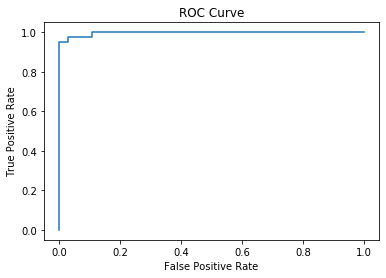

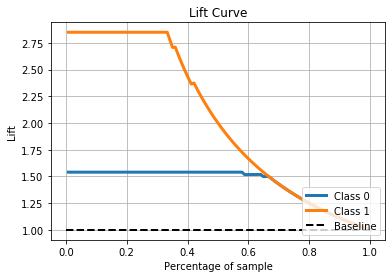

In [112]:
prob=model.predict_proba(x_test)[:,1]

#create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

#create Lift curve
skplt.metrics.plot_lift_curve(y_test,model.predict_proba(x_test))


### ROC Curve: Given that the line is really close to the top left corner, the model is really accurate.  
### Lift Curve: The two lines for Class 0 and Class 1 are all much higher than the baseline which is the line for random guess. Hence, the model is much better at predicting both class 1 and 0 than random guess.